회귀직선
==
붓꽃 꽃잎길이 예측, 
--

몸무게 예측
--


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [2]:
from sklearn import datasets 
iris = datasets.load_iris() 
# iris

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [6]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0, 0.5, 'Petal length')

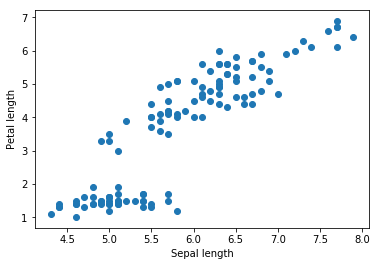

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

In [8]:
from sklearn.linear_model import LinearRegression 
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))


Score : 0.655


In [9]:
print(linr.coef_) 
print(linr.intercept_)

[1.8699969]
-7.233315234253802


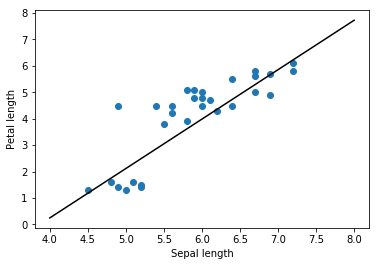

In [10]:
plt.scatter(X_test, y_test, marker='o') 
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

XX = np.linspace(4, 8, 3)
plt.plot(XX, linr.coef_ * XX + linr.intercept_, "k-")

In [11]:
## Applying KFold() cross validation 
X = X_all[:,0]
y = X_all[:,2]

cv = KFold(n_splits=5, shuffle=True)  # Returns the number of splitting iterations in the cross-validator.
score = cross_val_score(LinearRegression(), X.reshape(-1,1), y, cv=cv)

print(score)
print(score.mean())

[0.80110412 0.76458634 0.71730774 0.79768642 0.62495662]
0.7411282487253518


In [12]:
## what is cv?
print(cv)
print(cv.get_n_splits(X))

KFold(n_splits=5, random_state=None, shuffle=True)
5


In [13]:
for train_index, test_index in cv.split(X):
    print("TRAIN:\n", train_index,'\n', "TEST:\n", test_index)
    # X_train, X_test = X[train_index], X[test_index]
    # y_train, y_test = y[train_index], y[test_index]

TRAIN:
 [  0   1   2   3   4   5   7   8  11  12  13  14  15  16  18  19  20  21
  22  23  25  26  27  28  29  33  35  39  40  41  42  44  45  46  47  48
  49  50  51  52  53  55  56  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  80  81  82  84  85  86  87  88  90
  91  93  94  95  96  97  98  99 100 101 104 105 106 107 108 109 110 112
 113 116 118 119 120 121 122 124 125 127 128 129 130 131 132 133 134 135
 137 138 139 140 141 142 144 145 146 147 148 149] 
 TEST:
 [  6   9  10  17  24  30  31  32  34  36  37  38  43  54  57  58  79  83
  89  92 102 103 111 114 115 117 123 126 136 143]
TRAIN:
 [  0   1   2   3   4   6   7   8   9  10  11  13  14  17  18  19  21  22
  23  24  26  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43
  44  45  48  49  50  51  52  53  54  56  57  58  59  60  62  63  64  65
  66  68  69  70  71  72  73  74  76  77  78  79  80  81  82  83  84  85
  86  88  89  90  91  92  93  95  96  97  99 101 102 103 104 106 109 111

### using decision tree (will be covered later)

In [14]:
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train.reshape(-1,1), y_train) 
print(dec_reg.score(X_test.reshape(-1,1), y_test))

0.6603935908495113


## 몸무게 예측

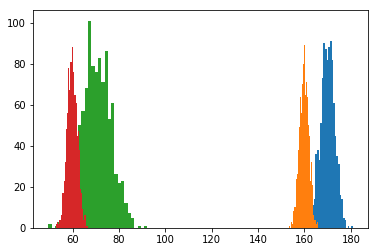

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[2.00605886]
0.9119276769876307


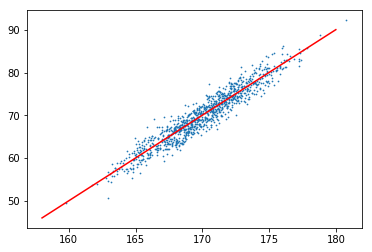

In [17]:
xs = np.linspace(158,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[0.97400761]
-95.90055352076634
0.7766630086299458


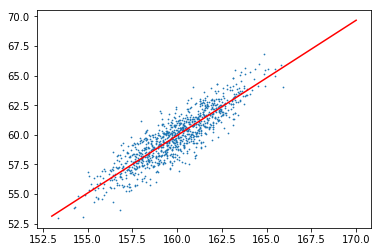

In [19]:
xs = np.linspace(153,170,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

In [20]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.13928868]
-123.01313594283967
0.8890144933681597


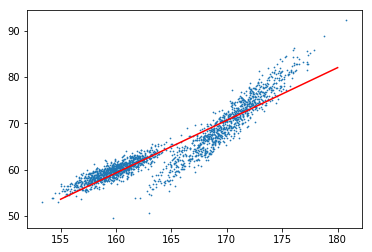

In [21]:
xs = np.linspace(155,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [24]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True) # 기존 인덱스 무시

In [26]:
y

array([66.85597626, 75.04903839, 63.64433191, ..., 61.89308944,
       57.8714835 , 57.78977422])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_)
print(leg.intercept_)
print(leg.score(X_test, y_test))

[1.67619073 6.80176552]
-214.93675109802462
0.9154969816301439


In [28]:
## 위의 결과는 1.713*zl + 7.148*성별 - 221.43 의 선형 모델 구성
## score 는 90.86 % 로 향상
## 성별은 0(남성), 1(여성)

In [29]:
X_train[:10]

height  sex
1888  160.079114    1
1609  161.258198    1
1331  159.867450    1
502   172.343244    0
1874  163.107456    1
26    168.653212    0
1867  161.049301    1
1084  161.211713    1
241   171.097715    0
411   174.409963    0

## 교차검증

In [30]:
from sklearn.model_selection import cross_val_score, KFold

In [31]:
X.shape

(2000, 2)

In [32]:
cross_val = KFold(n_splits=10, shuffle=True) # Whether to shuffle the data before 
                                             # splitting into batches.
score = cross_val_score(leg, X, y, cv=cross_val)
print(score)
print(score.mean())

[0.91817023 0.92841772 0.92563232 0.91261962 0.92775785 0.92259825
 0.91745164 0.91546145 0.91028744 0.9193077 ]
0.919770422713615


## 결정트리를 이용한 회귀 (뒤에서 설명함)

In [33]:
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print(dec_reg.score(X_test, y_test))

0.8926524385385338


In [34]:
X_train[:5]

height  sex
1888  160.079114    1
1609  161.258198    1
1331  159.867450    1
502   172.343244    0
1874  163.107456    1

In [35]:
y_train[:5]

array([57.90148595, 62.889326  , 60.0264449 , 75.96235915, 63.10231436])